# From the given 'IRIS' datasets, predict the optimum number of clusters and represent it visually.

# IMPORTING THE NECESSARY LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# IMPORTING THE DATASETS

In [2]:
df = pd.read_csv(r"C:\Users\H P\Downloads\Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# LABEL ENCODING(Since it has only 3 species)

In [5]:
species_col = {
    "Iris-setosa" : 0,
    "Iris-versicolor" : 1,
    "Iris-virginica" : 2
}

In [6]:
df['Species'] = df['Species'].map(species_col)

In [7]:
df[:10]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
5,6,5.4,3.9,1.7,0.4,0
6,7,4.6,3.4,1.4,0.3,0
7,8,5.0,3.4,1.5,0.2,0
8,9,4.4,2.9,1.4,0.2,0
9,10,4.9,3.1,1.5,0.1,0


In [8]:
X = df.iloc[:, [0, 1, 2, 3]].values

# CREATING A LOOP TO FIT KMeans Clustering

In [15]:
# Initialize an empty list to store the Within-Cluster Sum of Squares (WCSS) for different k values
# finding the optimum no. of clusters for k means.
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


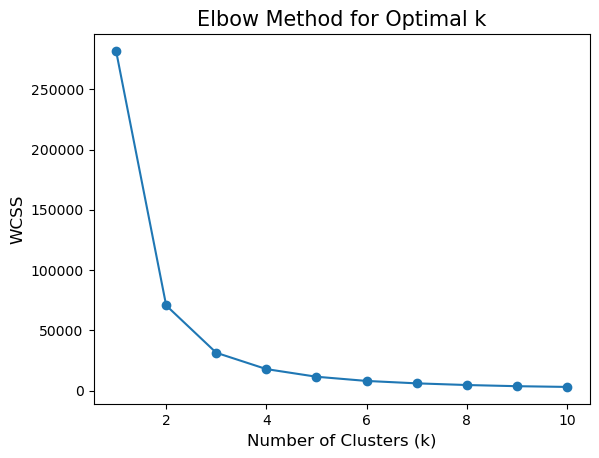

In [24]:
# Plotting the Results onto a line graph
plt.plot(range(1, 11), wcss, marker = 'o')
plt.title('Elbow Method for Optimal k', fontsize = 15)
plt.xlabel('Number of Clusters (k)', fontsize = 12)
plt.ylabel('WCSS', fontsize = 12)
plt.show()

The Elbow Method from the above graph is the optimum clusters where the elbow has occured.This is due to "Within Cluster Sum of Squares"(WCSS) doesn't decrease significantly with every clusters.

The number of clusters we choose is 3.

In [26]:
# Fit KMeans with the chosen number of clusters

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10)
y_pred = kmeans.fit_predict(X)

# VISUAL REPRESENTATION OF 3 CLUSTERS

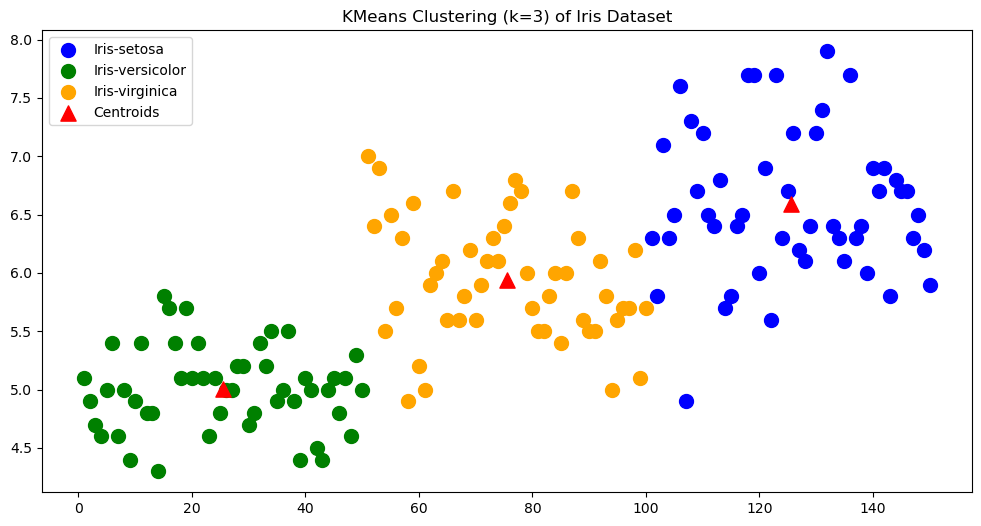

In [30]:
plt.figure(figsize = (12, 6))

# Plotting on first two features of the datasets
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s = 100, c = 'green', label = 'Iris-versicolor')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], s = 100, c = 'orange', label = 'Iris-virginica')

# Plotting Centroids on each of 3 clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 120, c = 'red', label = 'Centroids', marker = '^')
plt.title('KMeans Clustering (k=3) of Iris Dataset')
plt.legend()
plt.show()